In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import commonFunctions as cf
from collections import OrderedDict
import numpy as np
import operator

In [8]:
def plotHeatmapBar(plt,data,nxticks,name):
    plt.close()
    plt.subplots(figsize=(14,15),dpi=300)

    ax = sns.heatmap(data, vmin=-1, vmax=1,cmap='PRGn',linewidth=0.1,square=True,cbar_kws={"shrink": 0.5,"orientation": "horizontal"})
    plt,ax=setplot(plt,ax)
    ax.text(-0.04, 1.05, 'a)', transform=ax.transAxes, size=15,color='purple')
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.show()
    
def plotHeatmap(dataT,filters,fname,xlabel):
    plt.close()
    fig,ax=plt.subplots(figsize=(16,8),dpi=300)

    sns.heatmap(dataT,cbar_kws={"orientation": "horizontal","shrink":0.5},linewidth=0.1,cmap=plt.get_cmap('binary'),vmin=0,vmax=0.5)
    plt.yticks(list(map(lambda x:x+0.5,range(len(filters)))),reWriteTicks(filters),rotation=0)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    plt.xlabel(xlabel)
    plt.xticks([])
    plt.title('Unstability Factor')
    plt.savefig(fname,bbox_inches='tight')
    plt.show()
    
def reWriteTicks(ticks):
    for i in range(len(ticks)):
        tick = ticks[i].split('_')
        if len(tick)==2:
            supportType = tick[0]
            if supportType == 'ds':
                ticks[i] = tick[1].capitalize()+' ({})'.format('Df')
            elif supportType =='s':
                ticks[i] = tick[1].capitalize()+' ({})'.format('A')
        elif ticks[i]=='domsup':
            ticks[i]='Domestic'
    return ticks

In [3]:
filters, headers = cf.get_filters_headers()
year1=cf.loadPickle('year1')
dead=cf.loadPickle('dead')
alive=cf.loadPickle('alive')
yearLength=cf.loadPickle('yearLength')
organizationInfo=cf.loadPickle('organizationInfo_Std')

In [4]:
def getdata(organizationInfo,tofilter):
    data=[organizationInfo[nagcode] for nagcode in organizationInfo if nagcode in tofilter]
  
    dataT=list(map(list, zip(*data)))
    return data,dataT

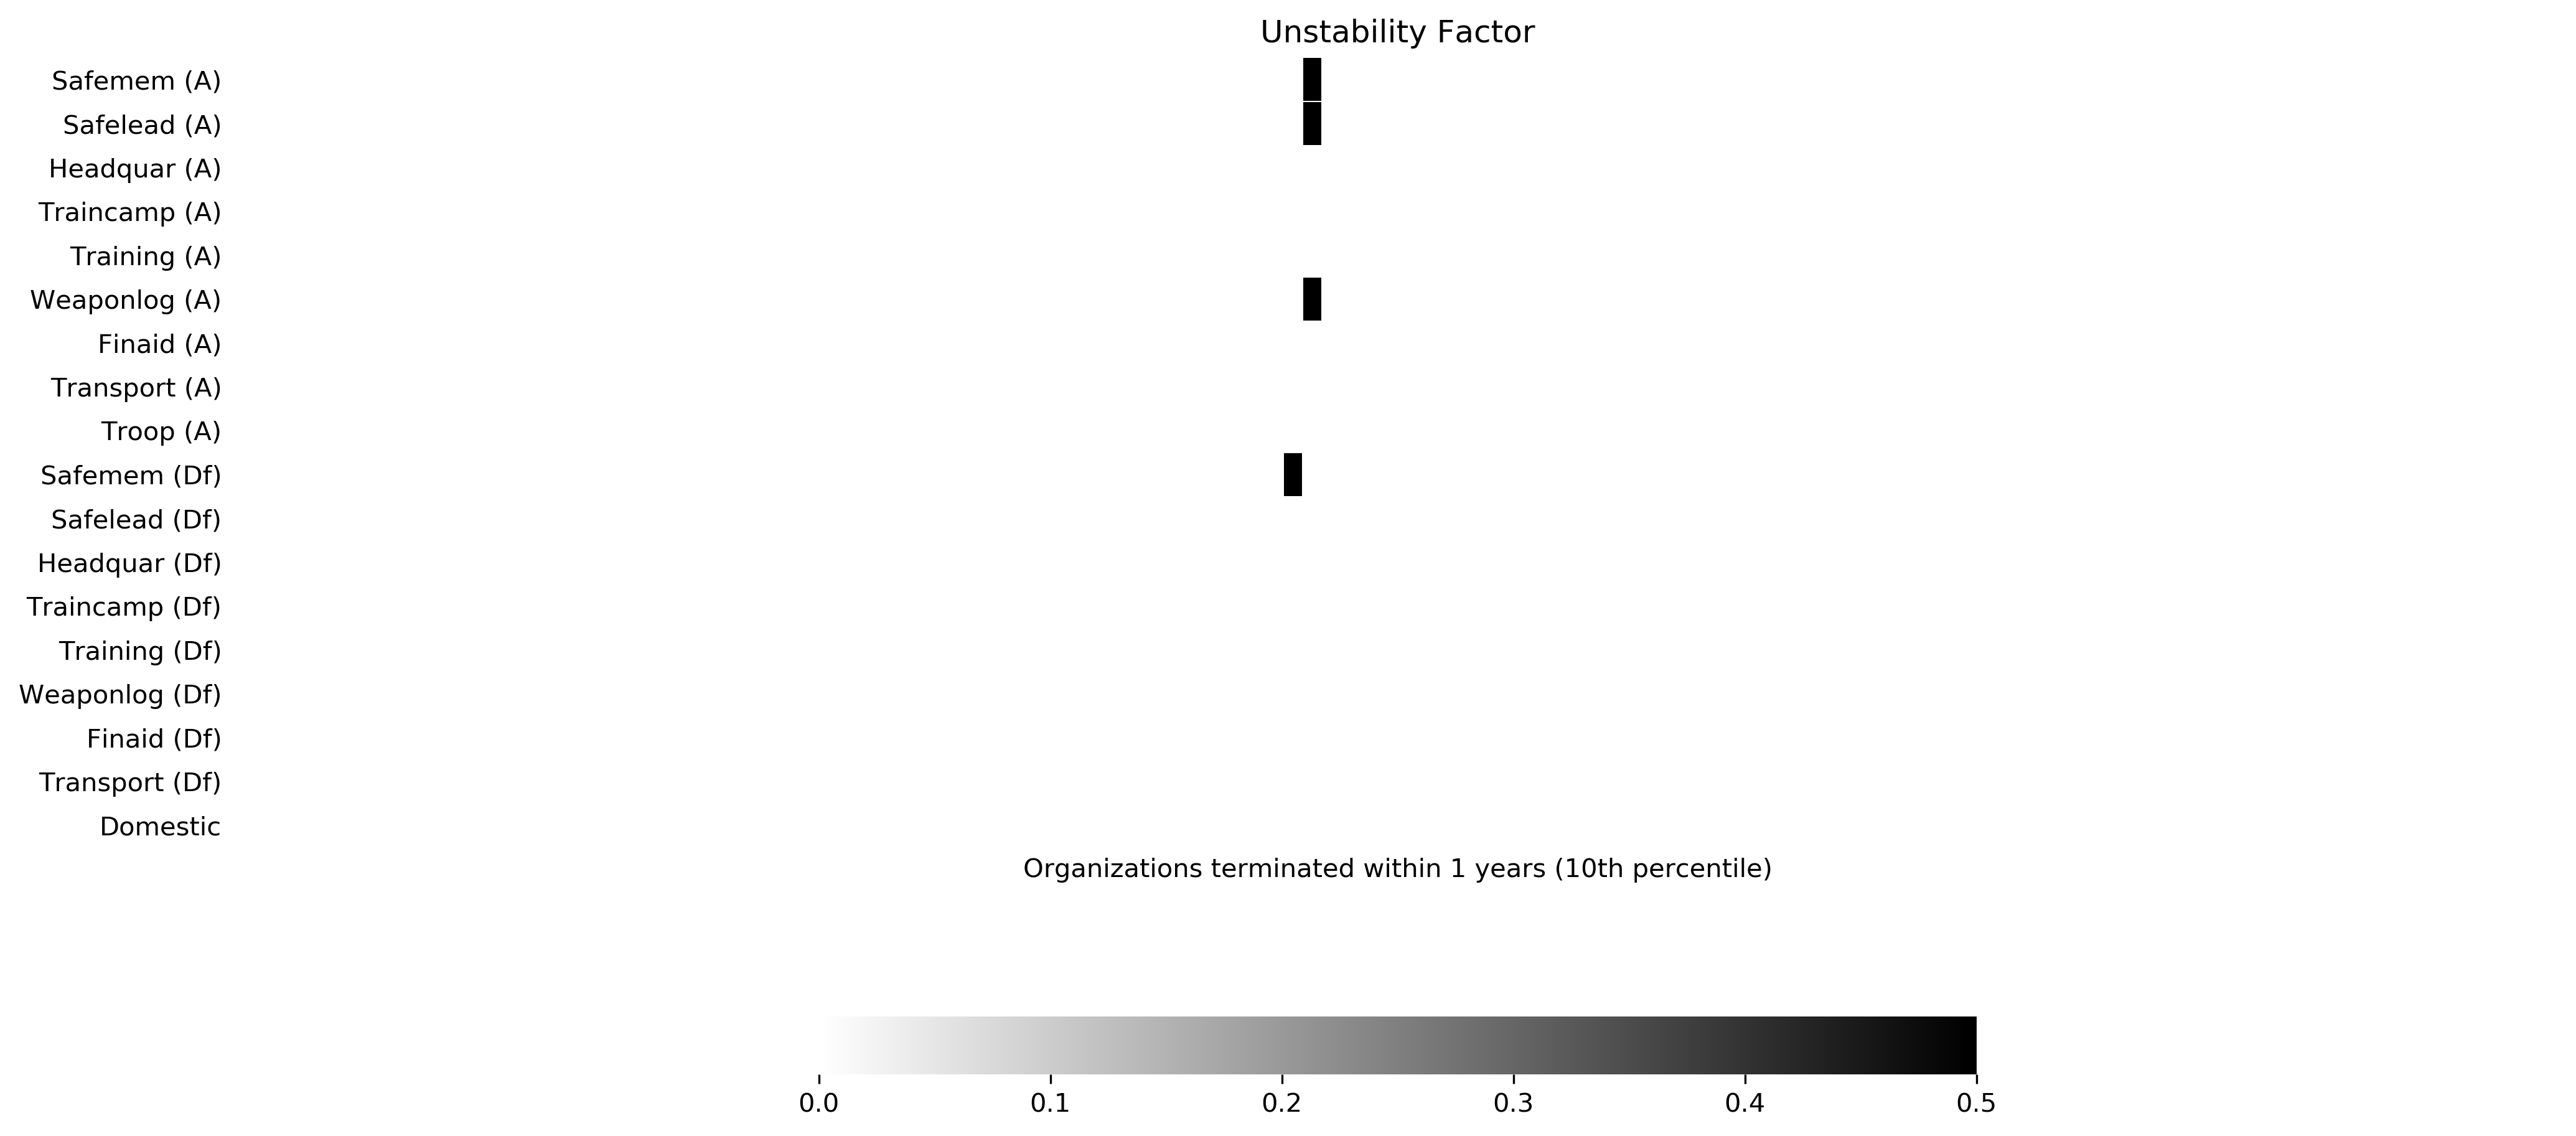

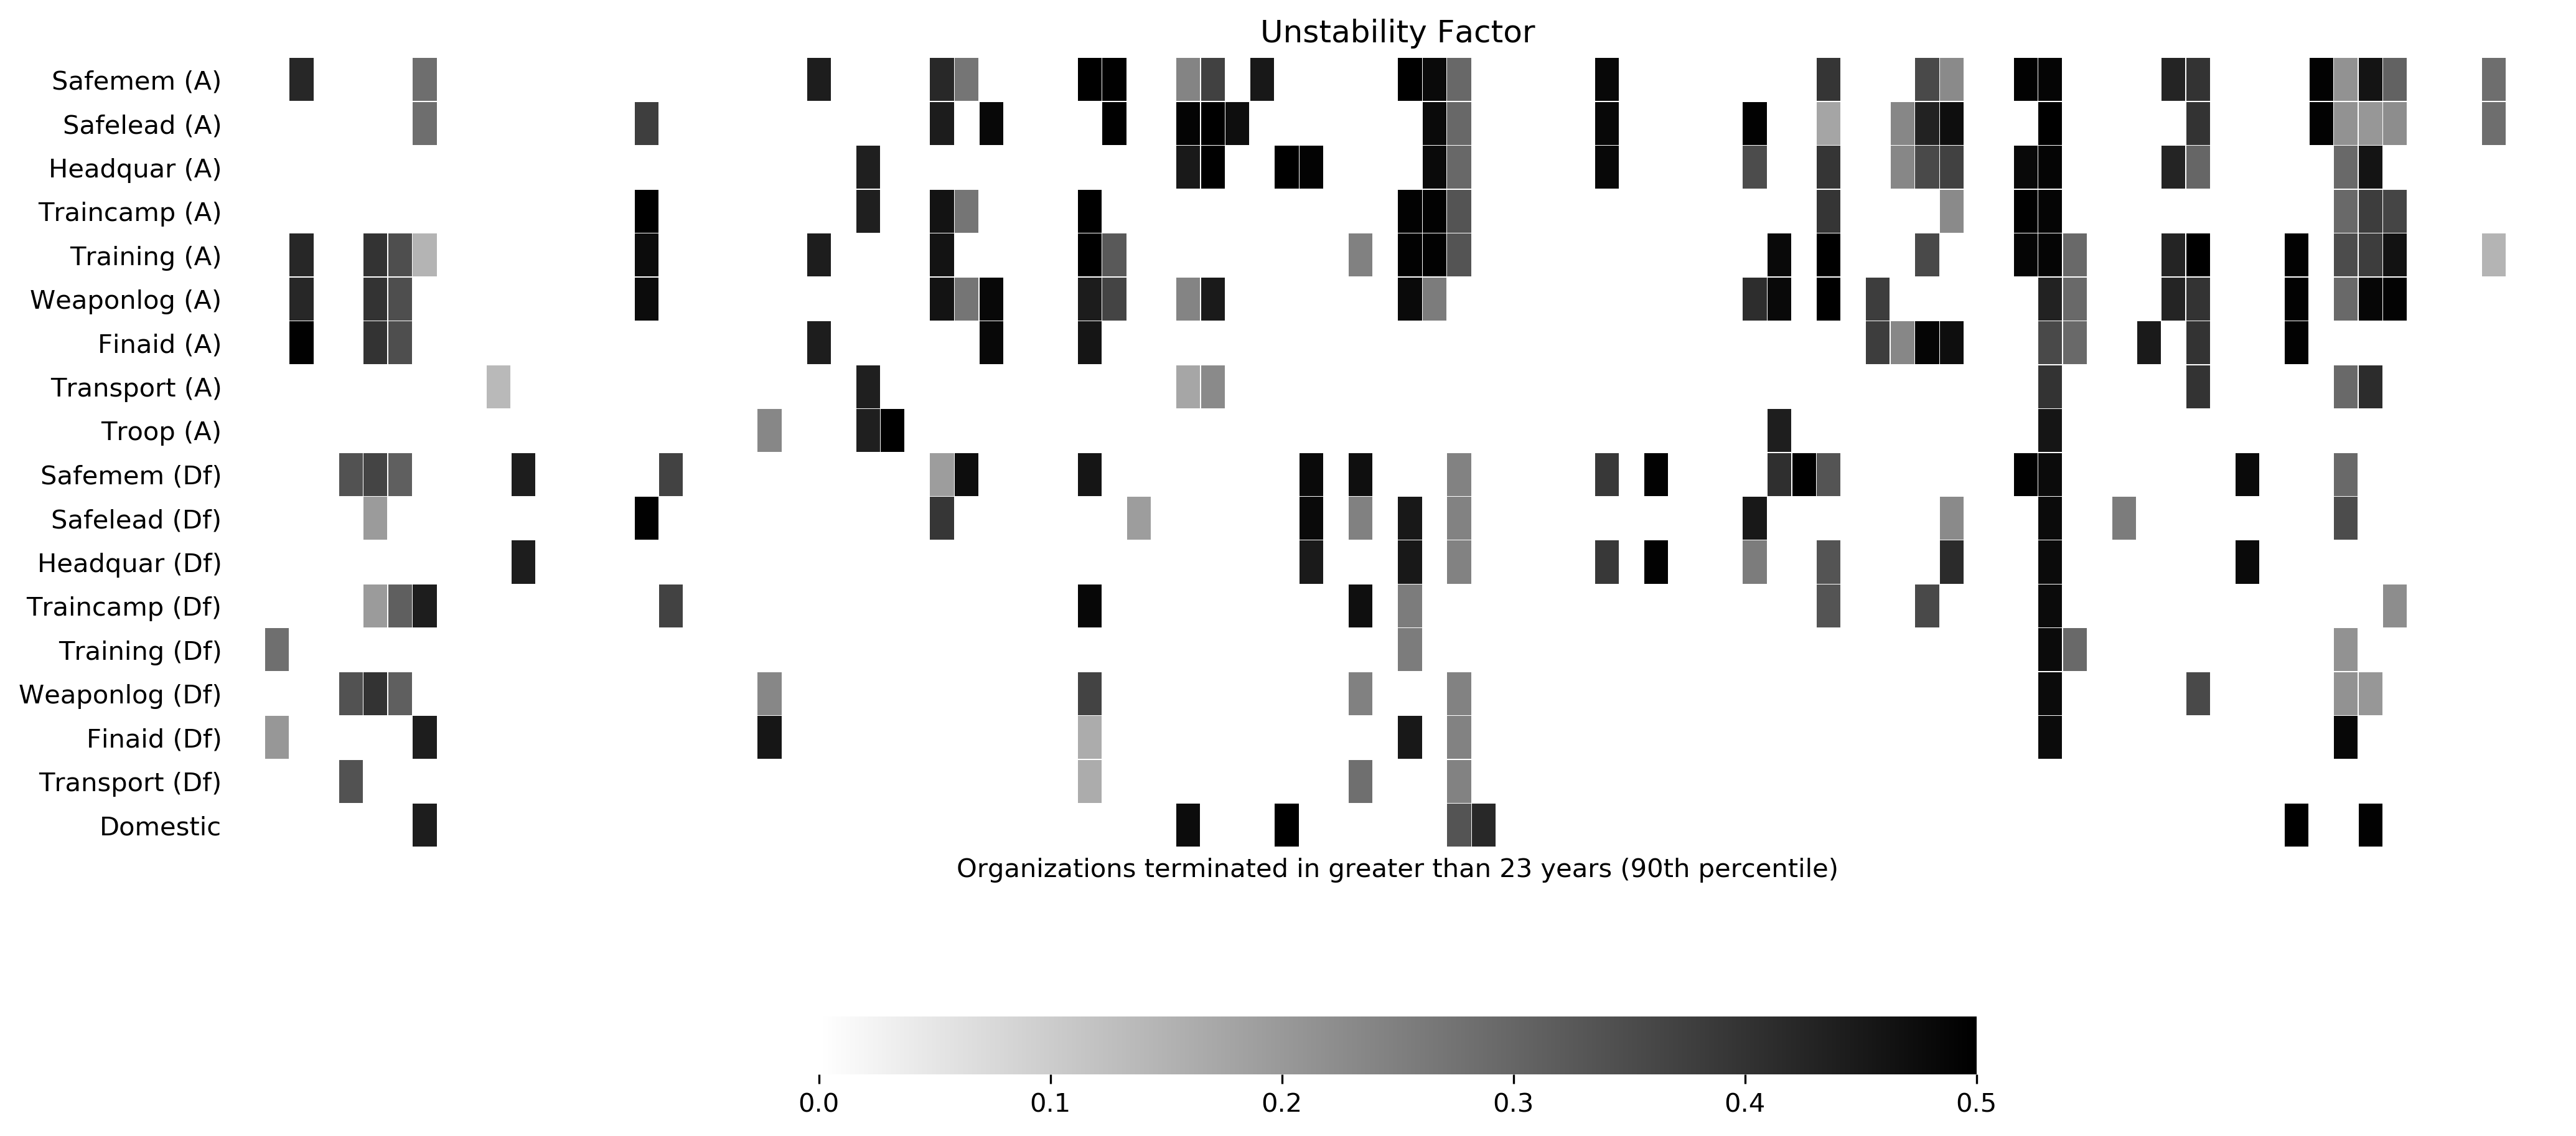

In [10]:
xlabel='Organizations terminated within 1 years (10th percentile)'
data,dataT=getdata(organizationInfo,[nagcode for nagcode in organizationInfo if yearLength[nagcode]<=2])
plotHeatmap(dataT,filters,'deprivation_.png',xlabel)

xlabel='Organizations terminated in greater than 23 years (90th percentile)'
data,dataT=getdata(organizationInfo,[nagcode for nagcode in organizationInfo if yearLength[nagcode]>13])
plotHeatmap(dataT,filters,'deprivation2_.png',xlabel)

In [11]:
# deprivation score

def init_access():
    ndata={}
    for filterby in filters:
        ndata[filterby]=0
    return ndata

def supportAccess(tofilter):
    # least stable and most stable
    leastAccess,mostAccess=init_access(),init_access()

    for nagcode in organizationInfo:
        if nagcode in tofilter:
            for filterby in filters:
                index=filters.index(filterby)
                if organizationInfo[nagcode][index]<=0.1:
                    mostAccess[filterby]+=1
                elif organizationInfo[nagcode][index]>=0.4:
                    leastAccess[filterby]+=1
#     leastAccess=sorted(leastAccess.items(),key=operator.itemgetter(1),reverse=True)
#     mostAccess=sorted(mostAccess.items(),key=operator.itemgetter(1),reverse=True)
    return leastAccess,mostAccess,len(tofilter)

In [12]:
def setplot(plt,axes):
    ax=axes[0]
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)
    
    ax=axes[1]
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 
    return plt,axes

def plotPyramid(plt,y,x1,x2,ticks,title,xlim=100,supertitle='',fname='image.png'):
    cmap=plt.get_cmap('binary')
    plt.close()
    fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(8,5),dpi=300)
    plt,axes=setplot(plt,axes)
    #plt,axes[1]=setplot(plt,axes[1])
    bars=axes[0].barh(y, x1, align='center', color=cmap(0.3),  edgecolor='blue', zorder=10)
    axes[0].set(title=title[0])
    axes[0].set_xlim(0,xlim)
    plt.grid('off')
    
    for bar in bars:
        bar.set_edgecolor("blue")
        bar.set_linewidth(1)
    
    bars=axes[1].barh(y, x2, align='center', color=cmap(0.3),  edgecolor='blue', zorder=10)
 
    axes[1].set_xlim(0,xlim)
    axes[0].set_xlabel('Percentage of organizations')
    axes[1].set_xlabel('Percentage of organizations')
    for bar in bars:
        bar.set_edgecolor("blue")
        bar.set_linewidth(1)

    axes[0].invert_xaxis()
    ticks = reWriteTicks(ticks)
    axes[0].set(yticks=y, yticklabels=ticks)
    axes[0].yaxis.tick_right()
    axes[1].set(title=title[1])

    for ax in axes.flat:
        ax.margins(0.03)
        ax.grid(False)
        
    plt.suptitle(supertitle, y=1.03)
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.3)
    plt.savefig(fname,bbox_inches='tight')
    plt.show()
    return

def plotUtility(l,m,n,title,xlim,supertitle,fname):
    m=sorted(m.items(),key=operator.itemgetter(1))
    xticks=[i[0] for i in m]
    y=list(range(len(l)))
    x1=[(l[i[0]]*100)/n for i in m]
    x2=[(i[1]*100)/n for i in m]
    plotPyramid(plt,y,x1,x2,xticks,title,xlim,supertitle,fname)

def plotUtility2(l,n1,m,n2,title,xlim,supertitle,fname):
    m=sorted(m.items(),key=operator.itemgetter(1))
    xticks=[i[0] for i in m]
    y=list(range(len(l)))
    x1=[(l[i[0]]*100)/n1 for i in m]
    x2=[(i[1]*100)/n2 for i in m]
    plotPyramid(plt,y,x1,x2,xticks,title,xlim,supertitle,fname)
    
def plotUtility3(l,n1,m,n2,title,xlim,supertitle,fname):
    l=sorted(l.items(),key=operator.itemgetter(1))
    xticks=[i[0] for i in l]
    y=list(range(len(l)))
    x1=[(i[1]*100)/n1 for i in l]
    x2=[(m[i[0]]*100)/n2 for i in l]
    plotPyramid(plt,y,x1,x2,xticks,title,xlim,supertitle,fname)
    
    
def centerText(y):
    maxlen = max([len(i) for i in y])
    for i in range(len(y)):
        templen = (maxlen - len(y[i]))//2
        reminder = maxlen-2*templen 
        templen= templen+1 if reminder == 1 else templen
        y[i] = ' '*templen + y[i] + ' '*templen
    return y

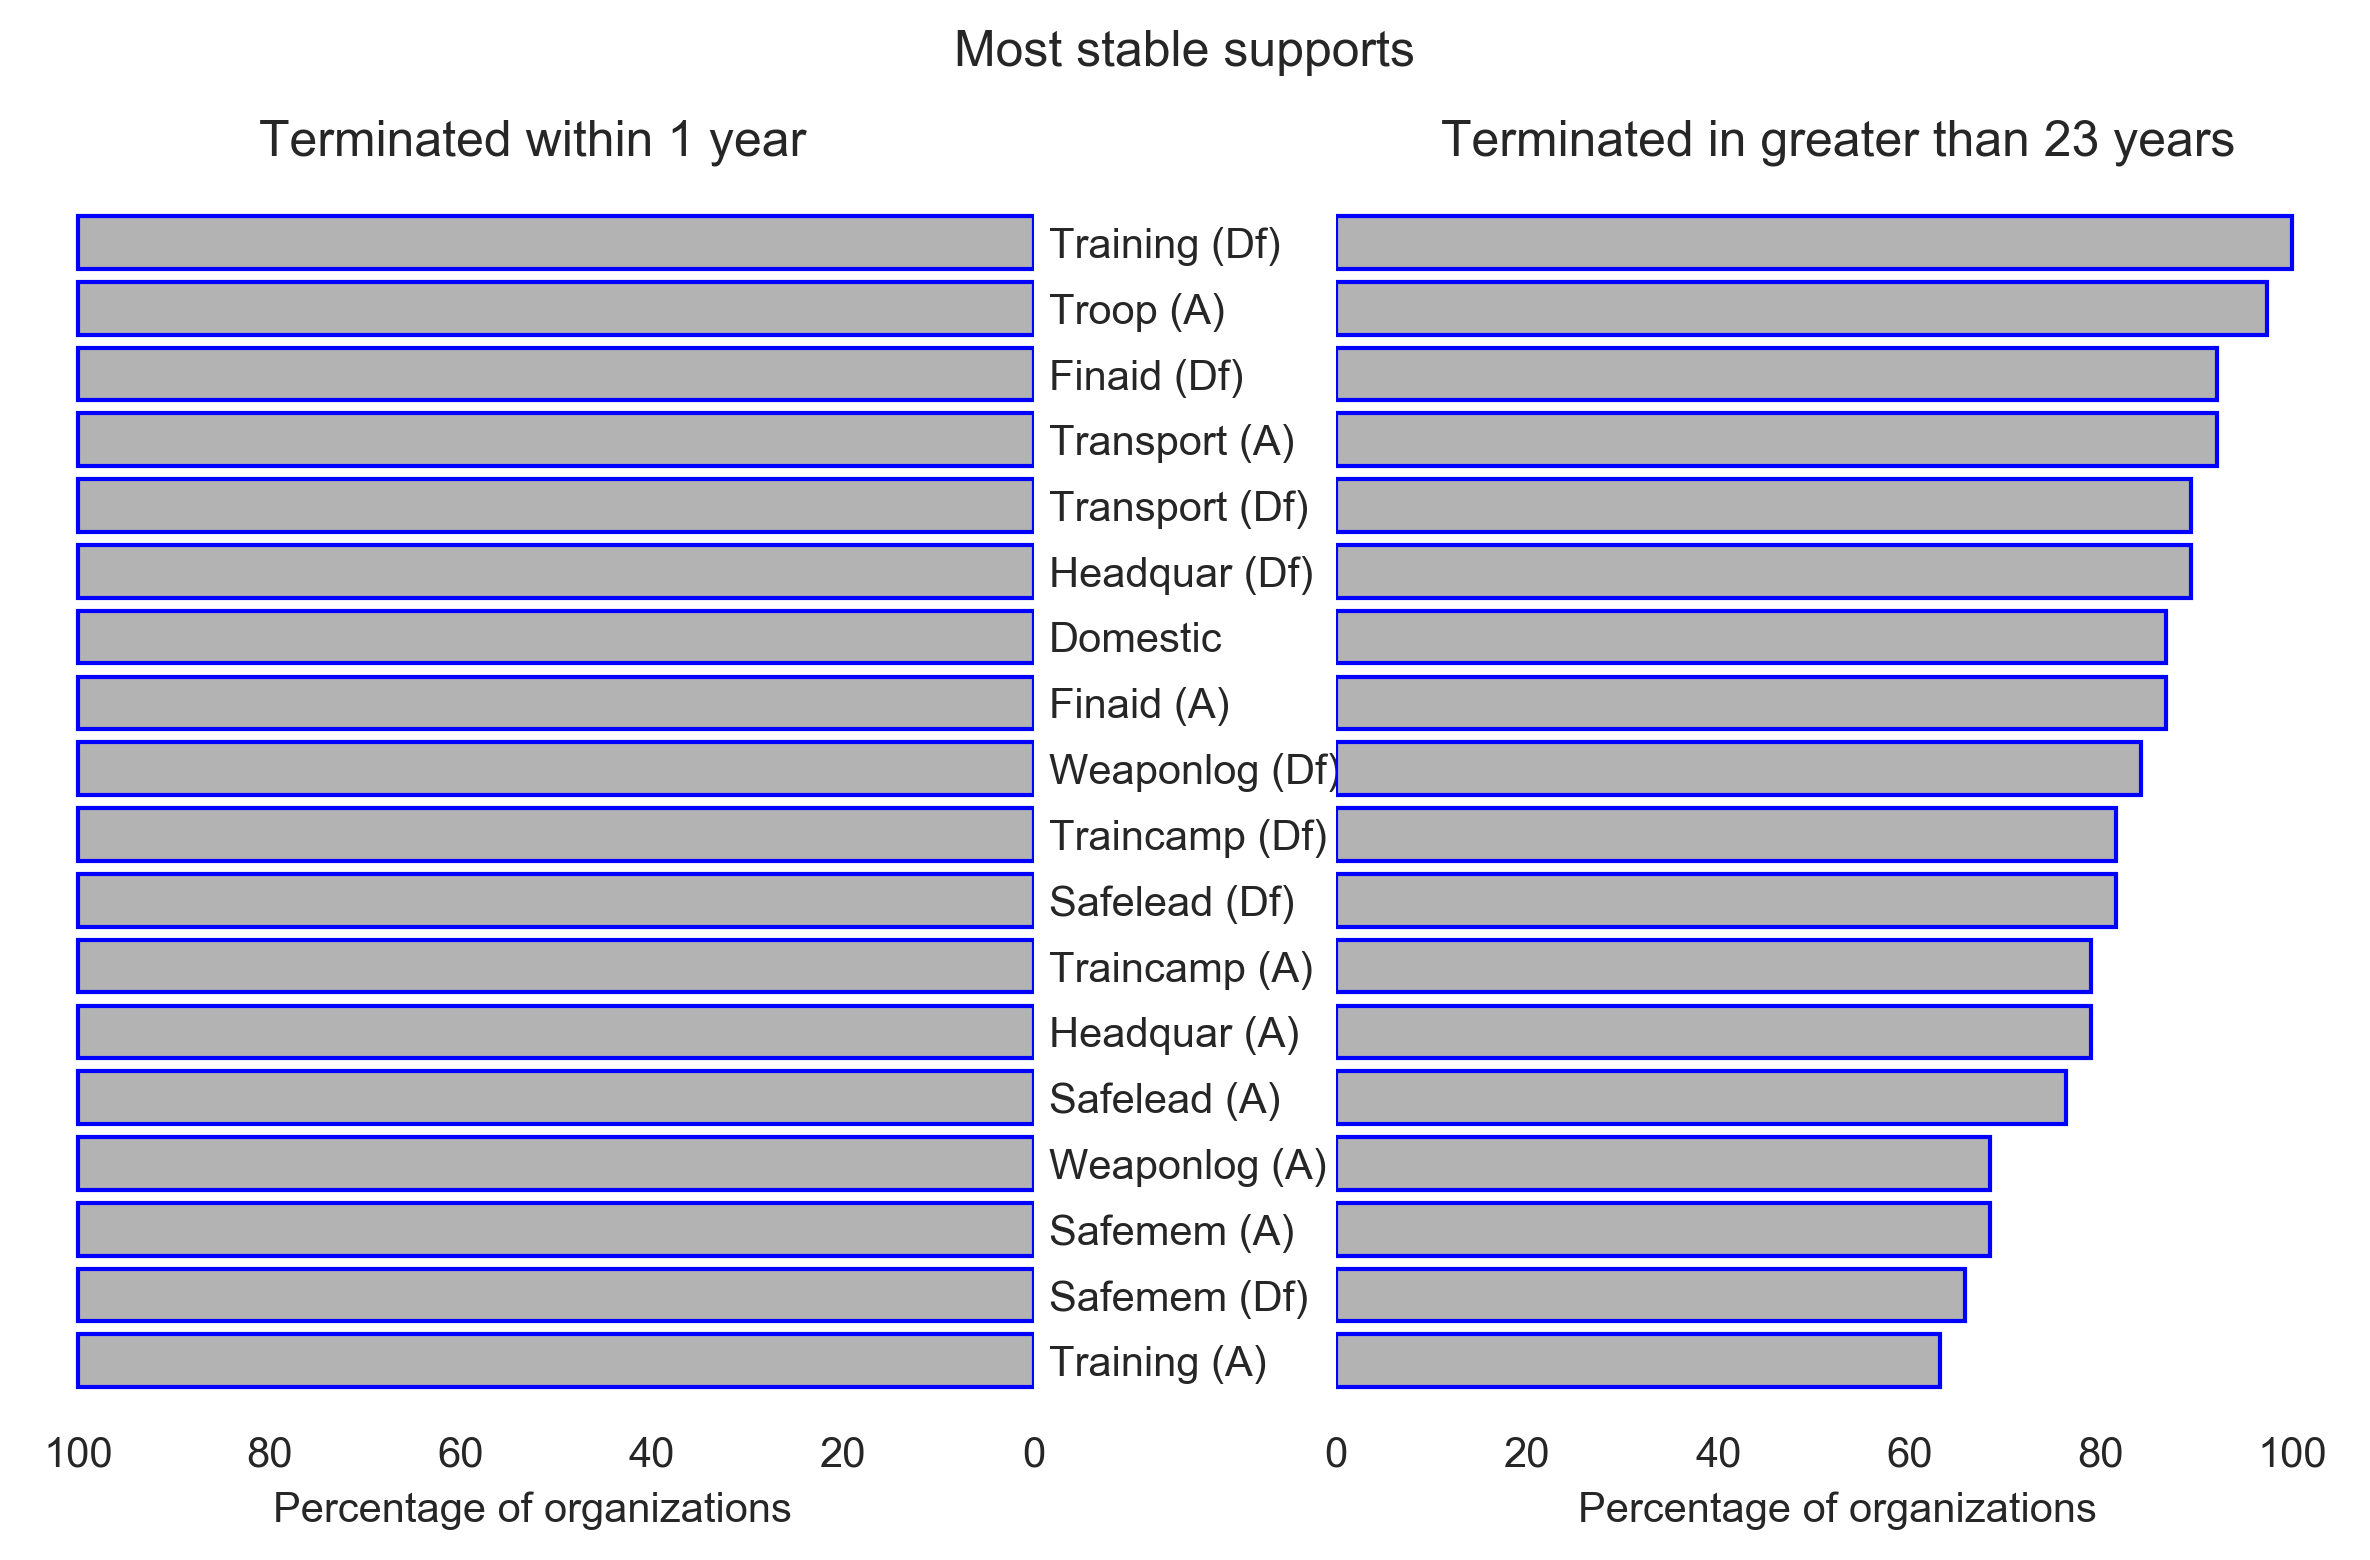

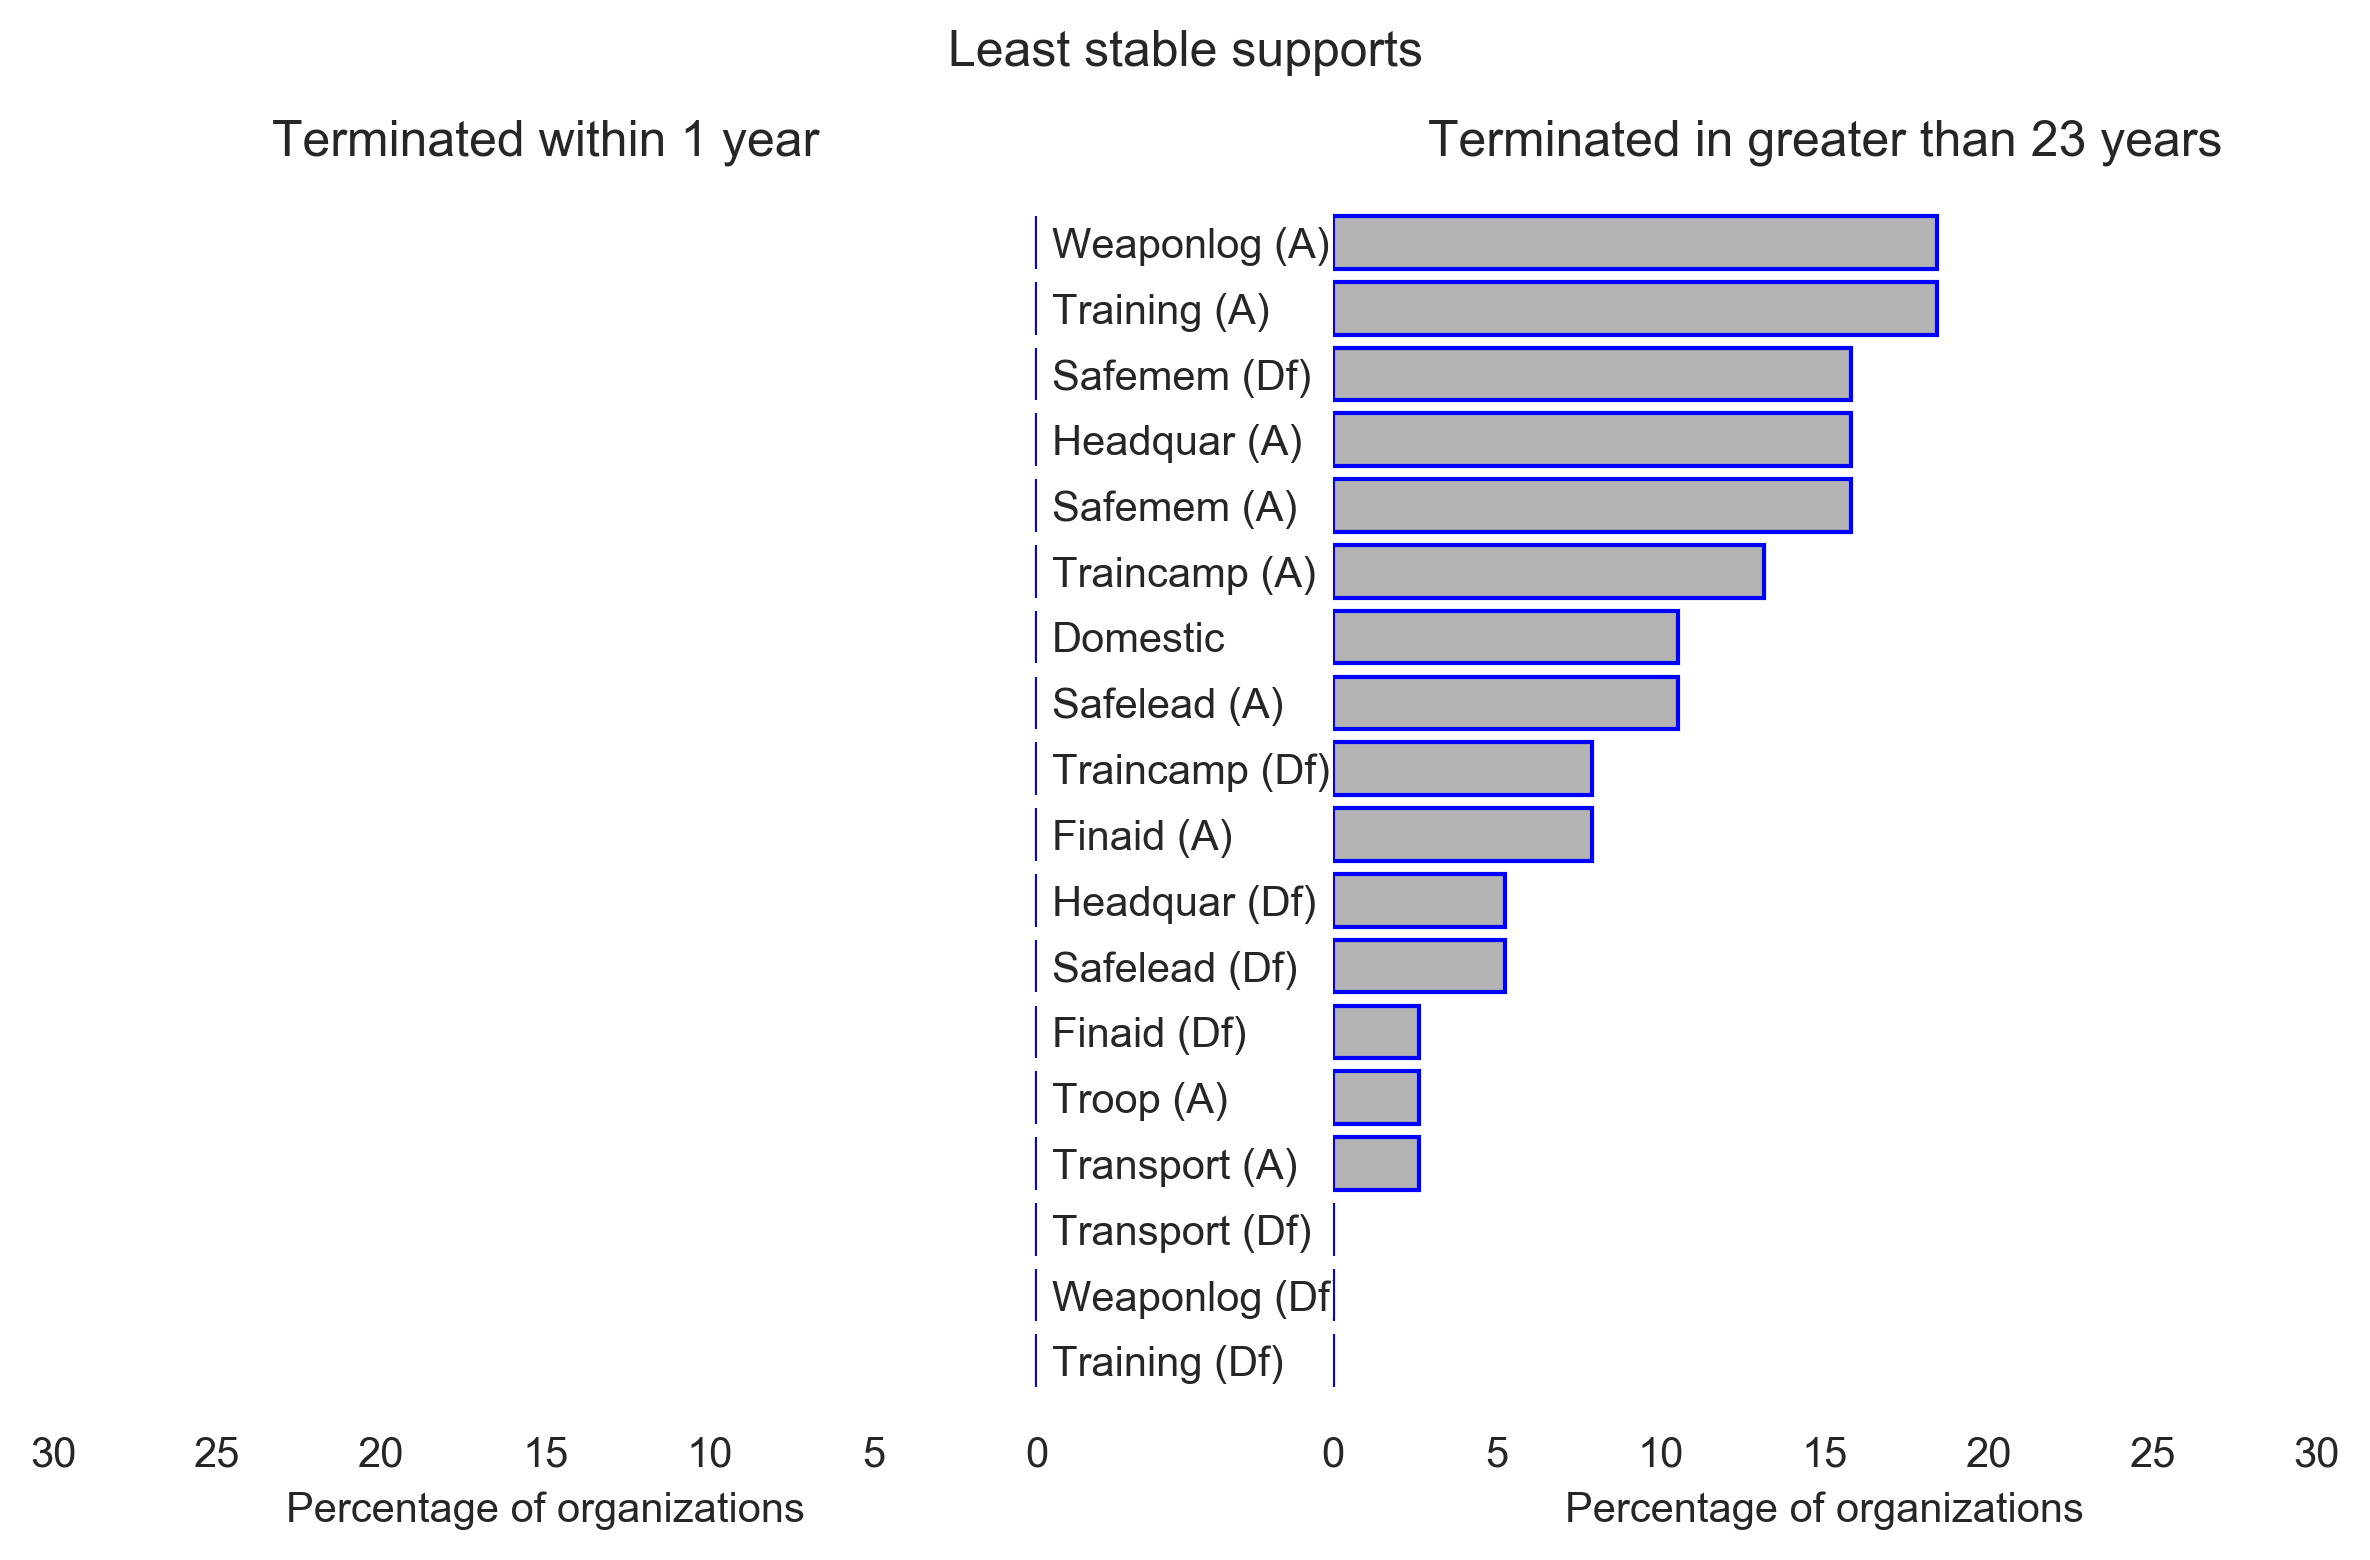

In [24]:
sns.set_style('white')
l1,m1,n1=supportAccess([nagcode for nagcode in yearLength if yearLength[nagcode]<=1])
l23,m23,n23=supportAccess([nagcode for nagcode in yearLength if yearLength[nagcode]>23])

ldead,mdead,ndead=supportAccess(dead)
lalive,malive,nalive=supportAccess(alive)
lall,mall,nall=supportAccess(list(organizationInfo.keys()))

global_sub = 'a)'
plotUtility2(m1,n1,m23,n23,['Terminated within 1 year','Terminated in greater than 23 years'],105,'Most stable supports','paperImages/std_mostsupport.png') 
global_sub = 'b)'
plotUtility2(l1,n1,l23,n23,['Terminated within 1 year','Terminated in greater than 23 years'],30,'Least stable supports','paperImages/std_leastsupport.png') 

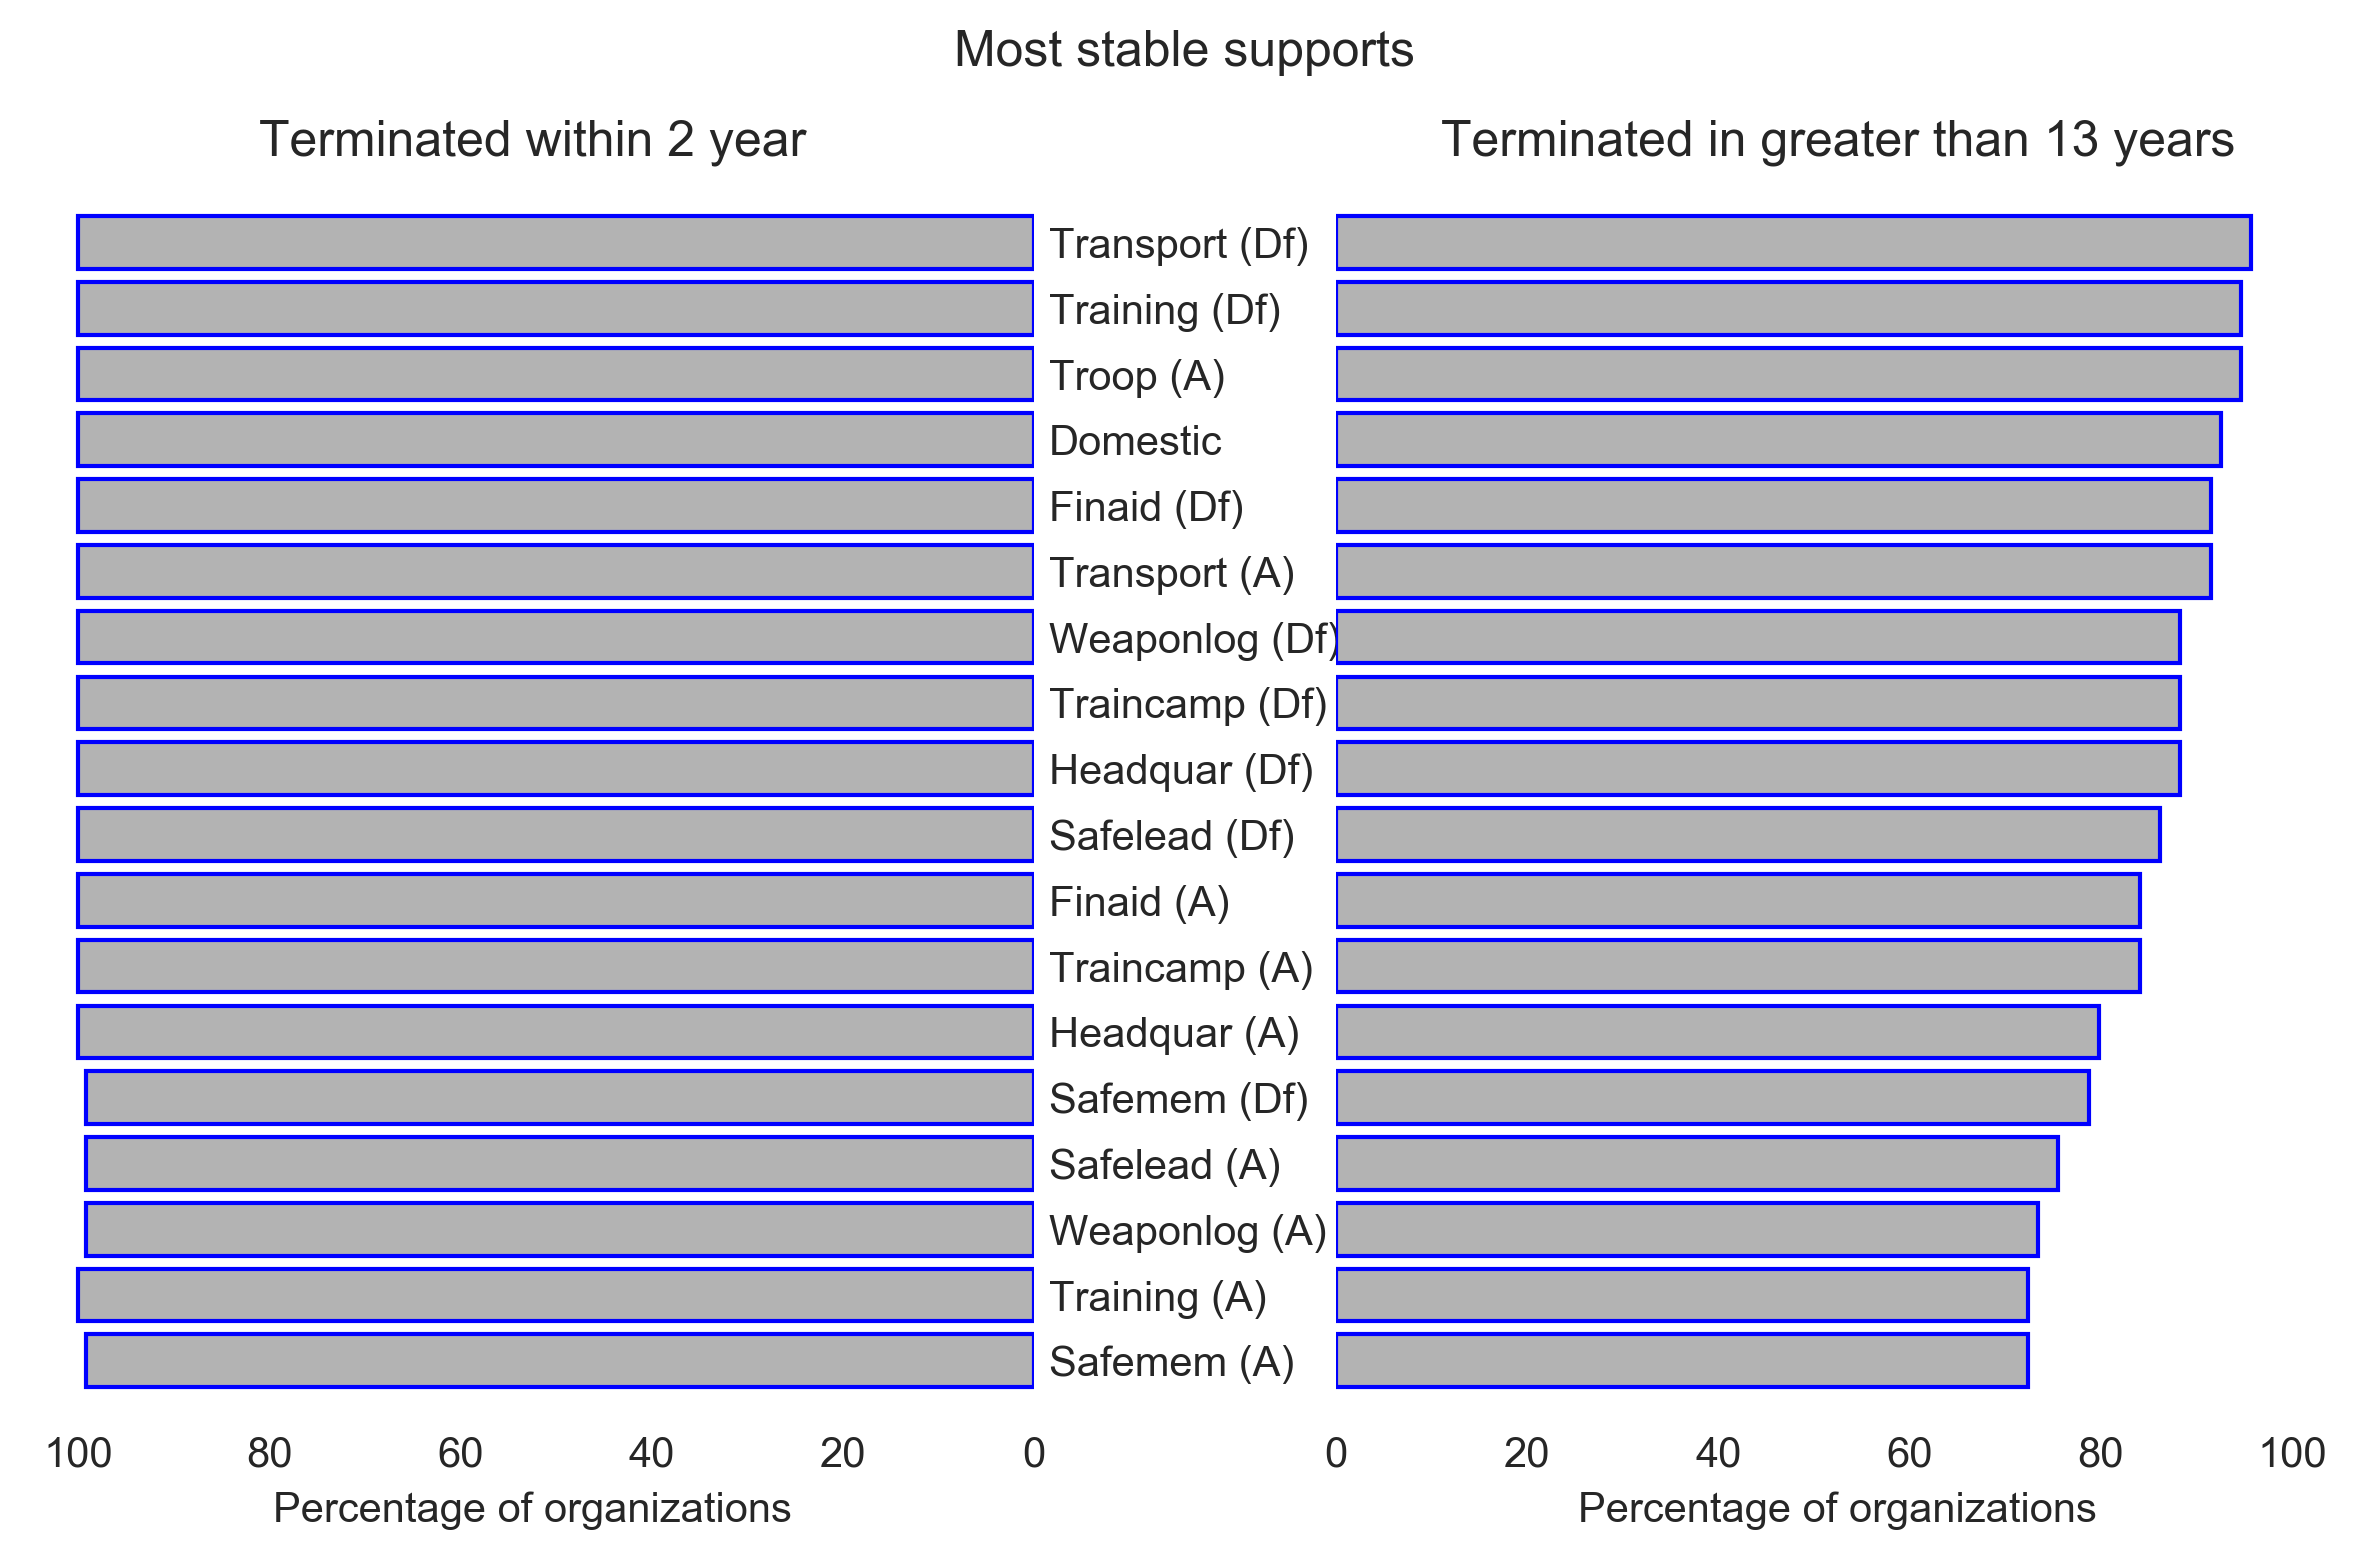

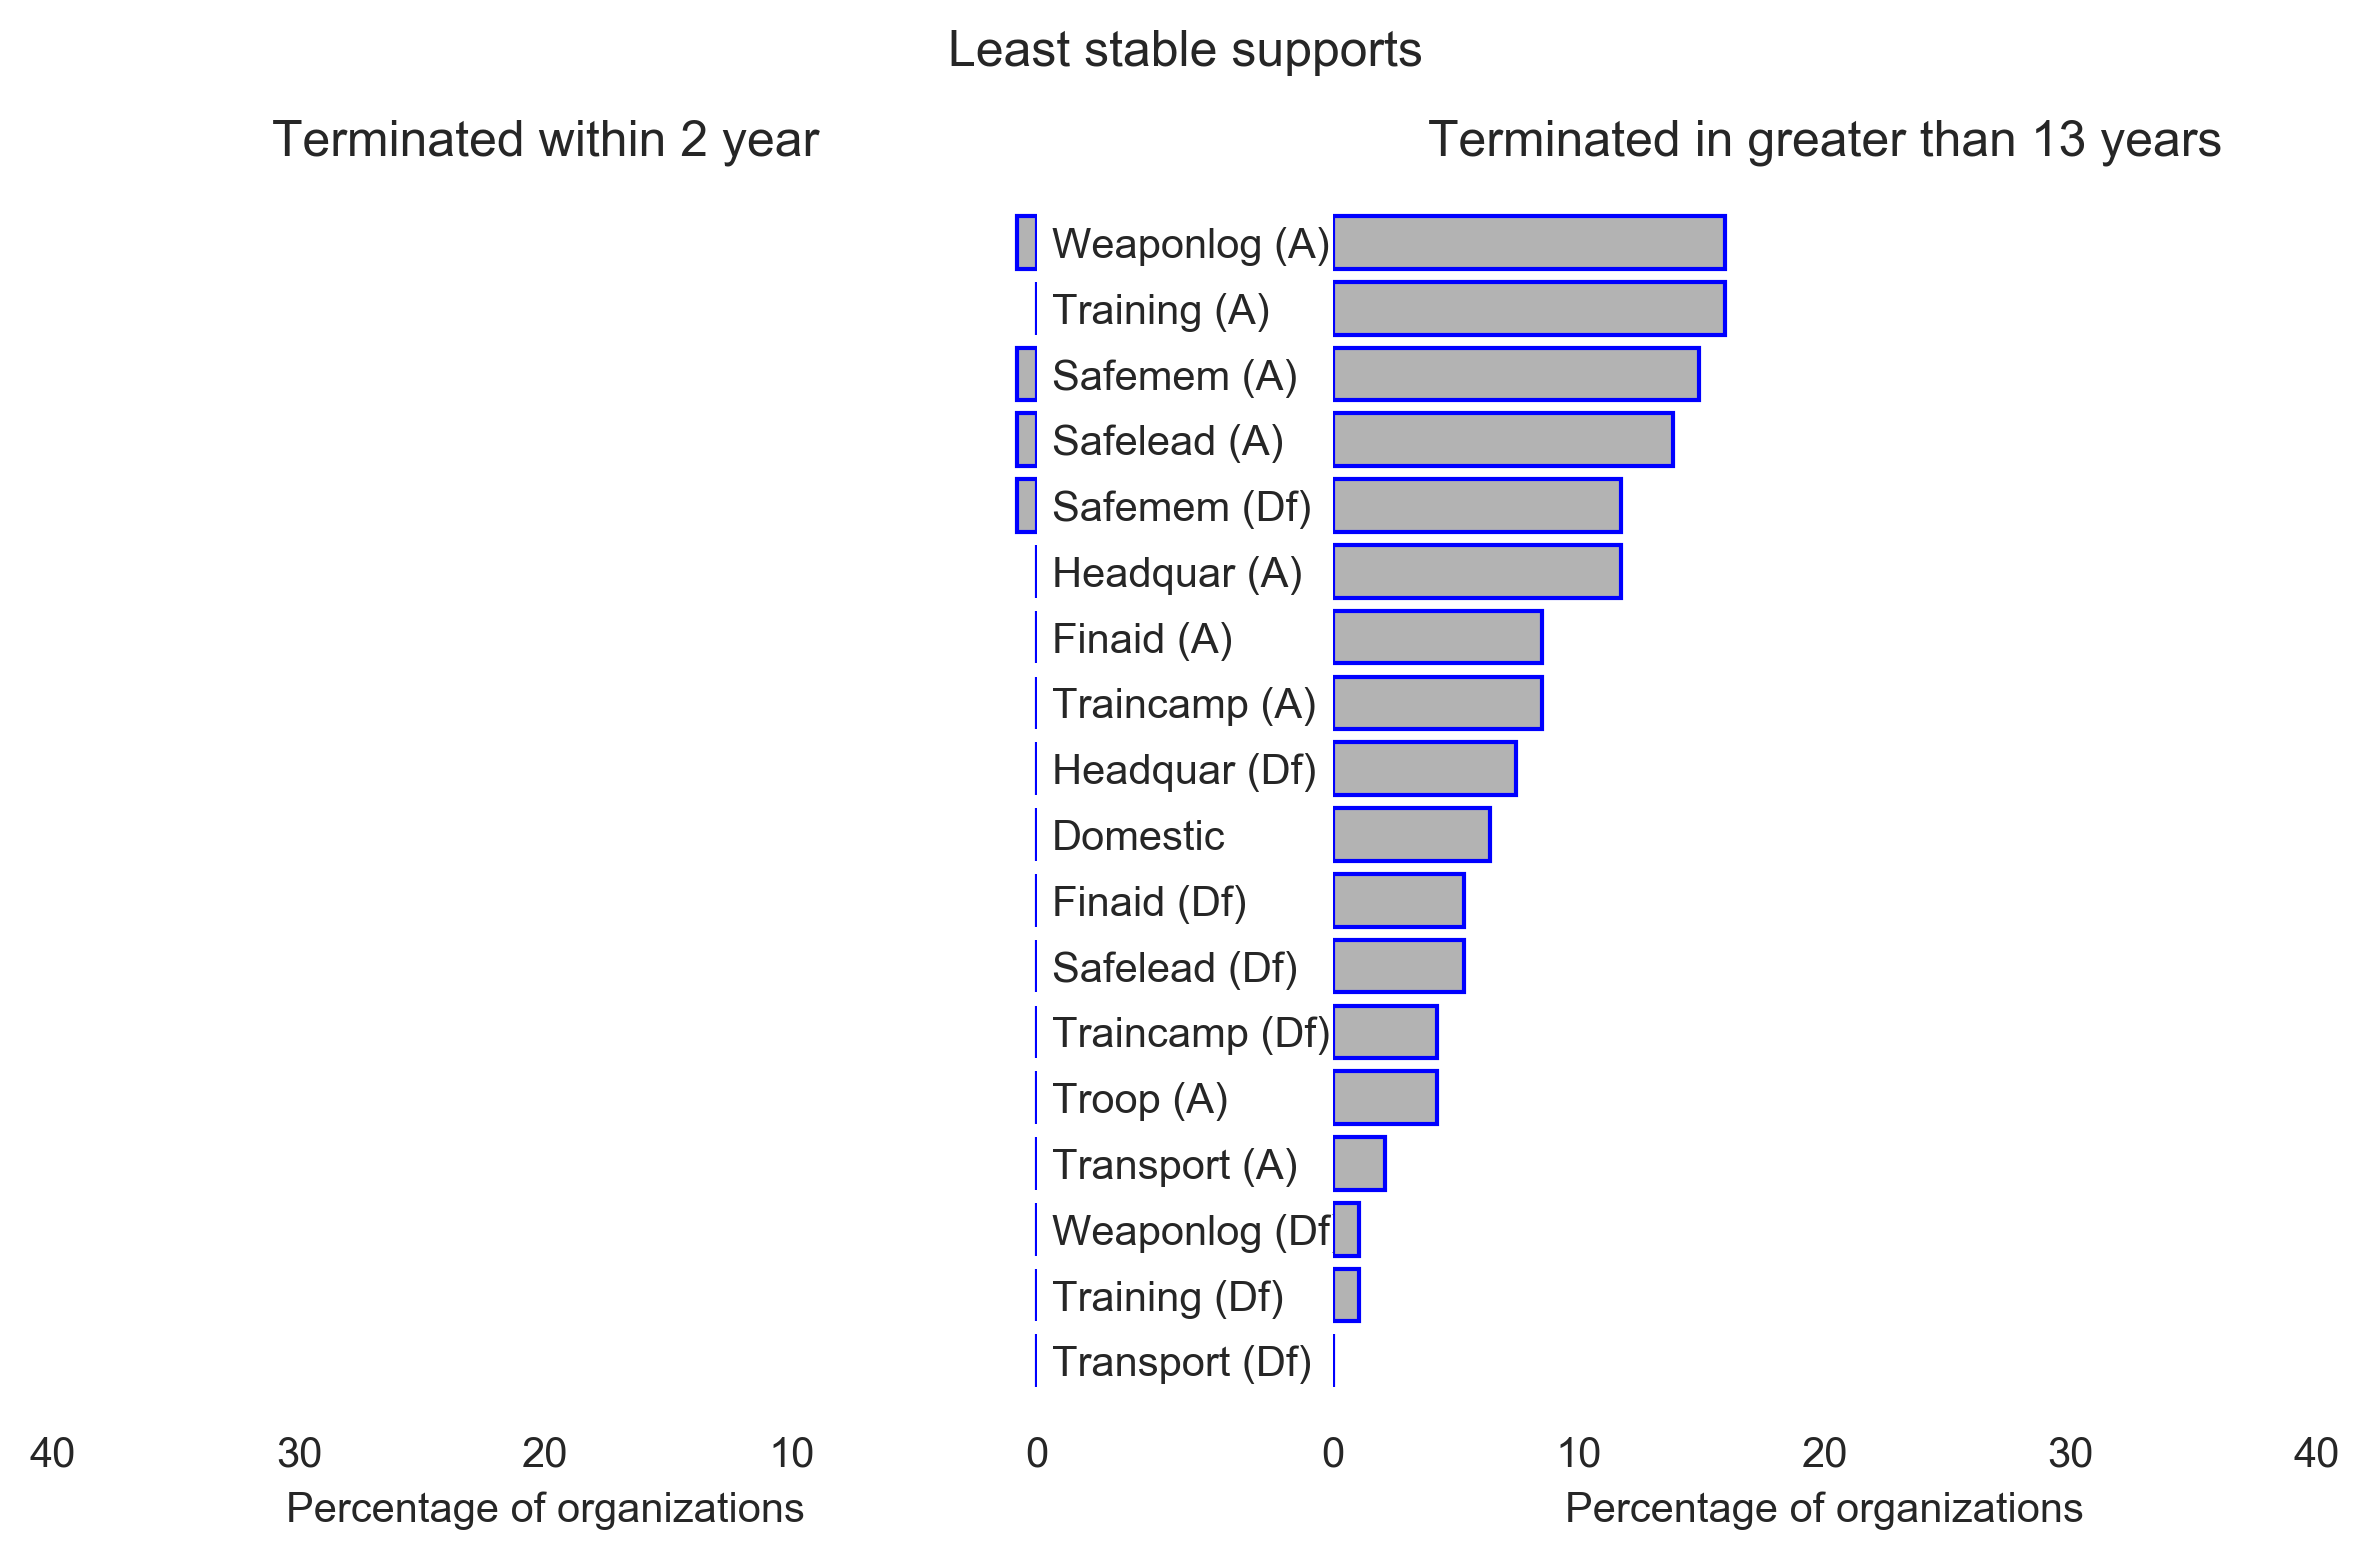

In [26]:
sns.set_style('white')
l1,m1,n1=supportAccess([nagcode for nagcode in yearLength if yearLength[nagcode]<=2])
l23,m23,n23=supportAccess([nagcode for nagcode in yearLength if yearLength[nagcode]>13])

ldead,mdead,ndead=supportAccess(dead)
lalive,malive,nalive=supportAccess(alive)
lall,mall,nall=supportAccess(list(organizationInfo.keys()))

global_sub = 'c)'
plotUtility2(m1,n1,m23,n23,['Terminated within 2 year','Terminated in greater than 13 years'],105,'Most stable supports','paperImages/std_mostsupport_q13.png') 
global_sub = 'd)'
plotUtility2(l1,n1,l23,n23,['Terminated within 2 year','Terminated in greater than 13 years'],40,'Least stable supports','paperImages/std_leastsupport_q13.png') 

In [ ]:
ca